In [ ]:
# Step 1: Load the dataset and perform basic inspection

import pandas as pd

regression_file = "/content/drive/MyDrive/Concept and technology of AI/Obesity prediction.csv"
classification_file = "/content/drive/MyDrive/Concept and technology of AI/co2.csv"

df_regression = pd.read_csv(regression_file)
df_classification = pd.read_csv(classification_file)
print("Regression Dataset:")
print(df_regression.info())
print("\nClassification Dataset:")
print(df_classification.info())



Regression Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8)

In [ ]:
# Display the first five rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print("\nRegression Dataset:")
print(df_regression.head())
print("\nClassification Dataset:")
print(df_classification.head())

# Display the number of missing values per column
print("\nMissing Values per Column:")
print("\nRegression Dataset:")
print(df_regression.isnull().sum())
print("\nClassification Dataset:")
print(df_classification.isnull())


First 5 Rows of the Dataset:

Regression Dataset:
   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2       

In [ ]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Features:")
print("\nRegression Dataset:")
print(df_regression.describe())
print("\nClassification Dataset:")
print(df_classification.describe())

# Check for duplicate rows
duplicate_rowsR = df_regression.duplicated().sum()
print(f"\nNumber of Duplicate Rows for Regression: {duplicate_rowsR}")
duplicate_rowsC = df_classification.duplicated().sum()
print(f"\nNumber of Duplicate Rows for Classification: {duplicate_rowsC}")



Summary Statistics for Numerical Features:

Regression Dataset:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505  

In [ ]:
# Step 2: Data Cleaning

# Remove duplicate rows
df_cleanedR = df_regression.drop_duplicates()
df_cleanedC = df_classification.drop_duplicates()
# Display the number of rows before and after duplicate removal
print(f"Original dataset size of Regression: {df_regression.shape[0]} rows")
print(f"Original dataset size of Classification: {df_classification.shape[0]} rows")
print(f"Dataset size after removing duplicates from Regression: {df_cleanedR.shape[0]} rows")
print(f"Dataset size after removing duplicates from classification: {df_cleanedC.shape[0]} rows")

Original dataset size of Regression: 2111 rows
Original dataset size of Classification: 7385 rows
Dataset size after removing duplicates from Regression: 2087 rows
Dataset size after removing duplicates from classification: 6282 rows


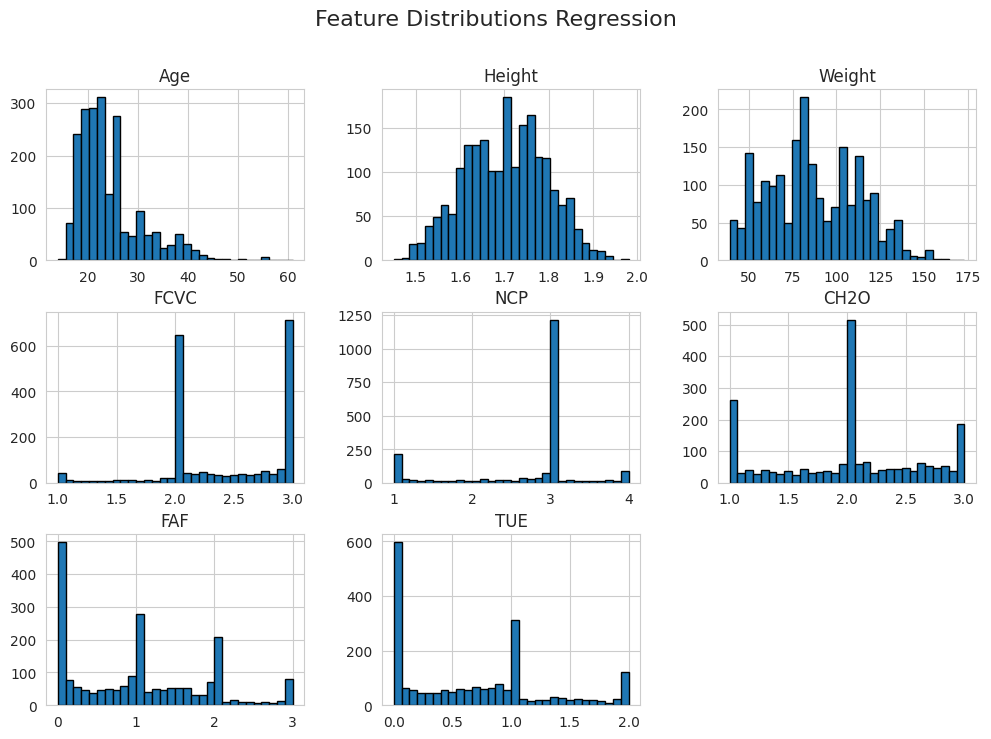

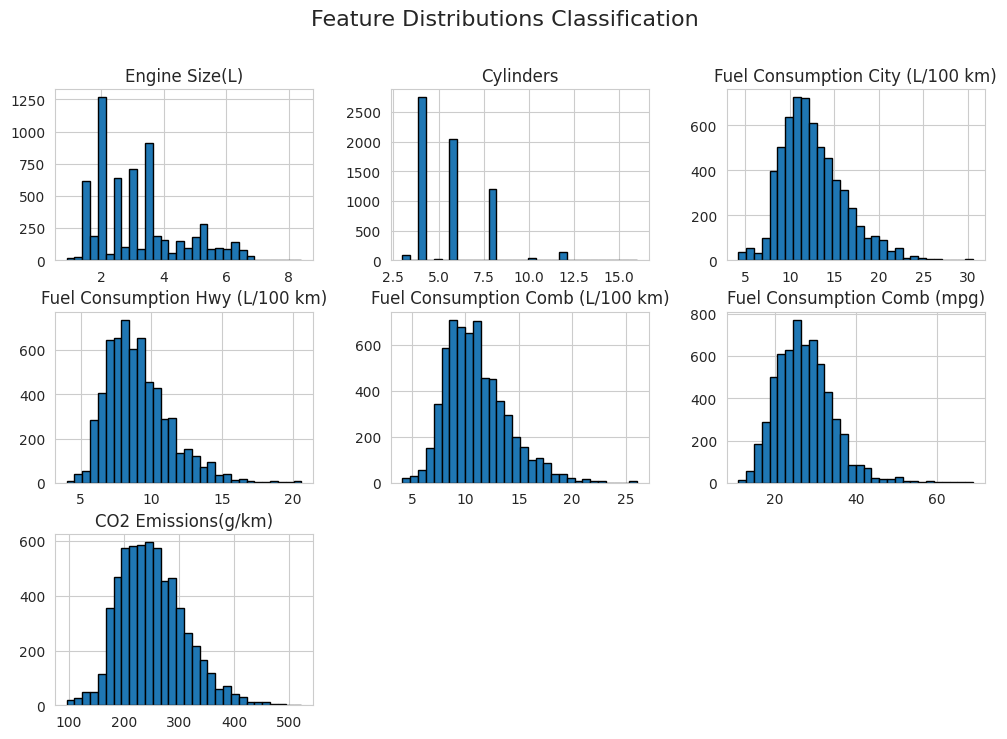

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Create histograms for feature distributions

df_cleanedR.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions Regression", fontsize=16)
df_cleanedC.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions Classification", fontsize=16)
plt.show()


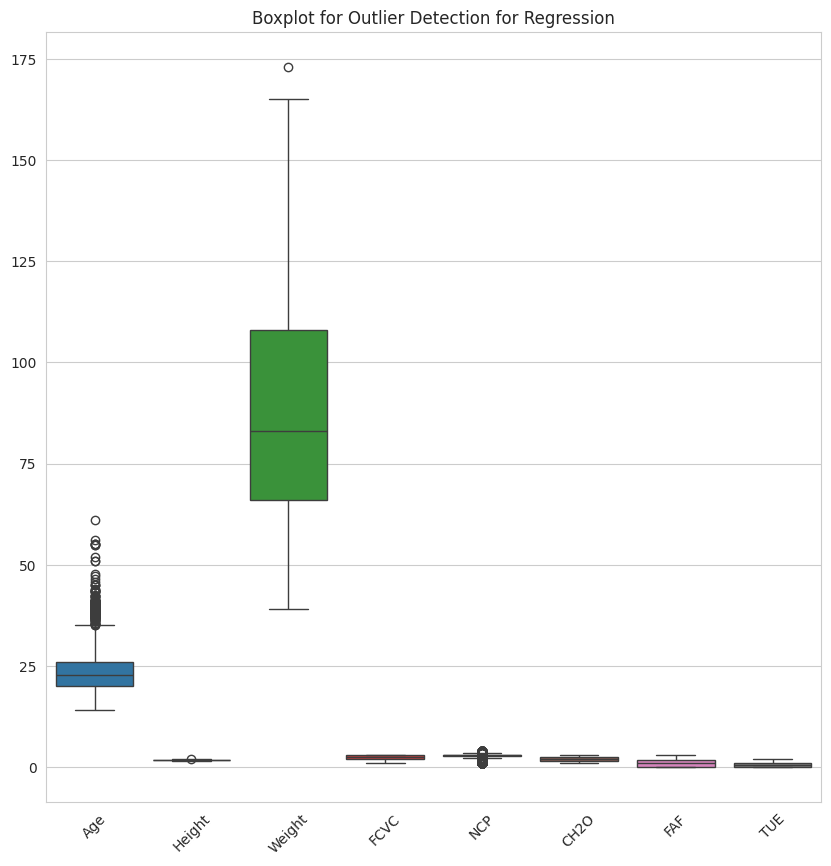

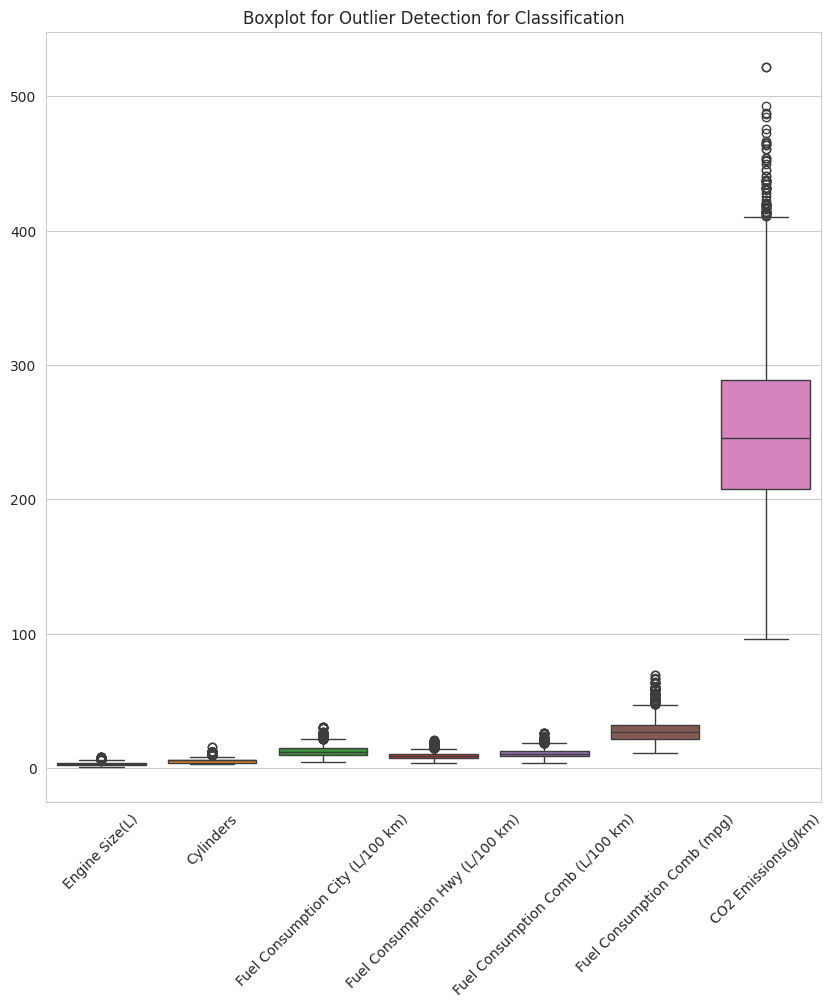

In [ ]:
# Boxplots to detect outliers Regression
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_cleanedR)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection for Regression")

# Boxplots to detect outliers Classification
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_cleanedC)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection for Classification")
plt.show()


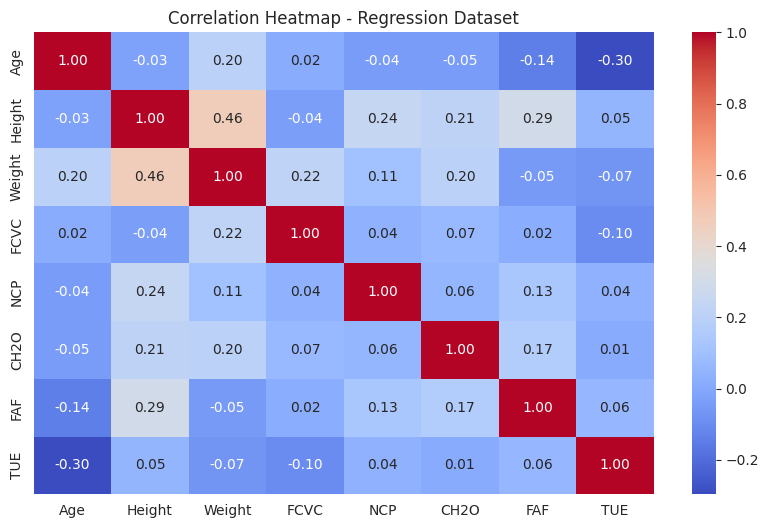

In [ ]:
# Data Visualization for Regression
plt.figure(figsize=(10, 6))
sns.heatmap(df_regression.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Regression Dataset")
plt.show()

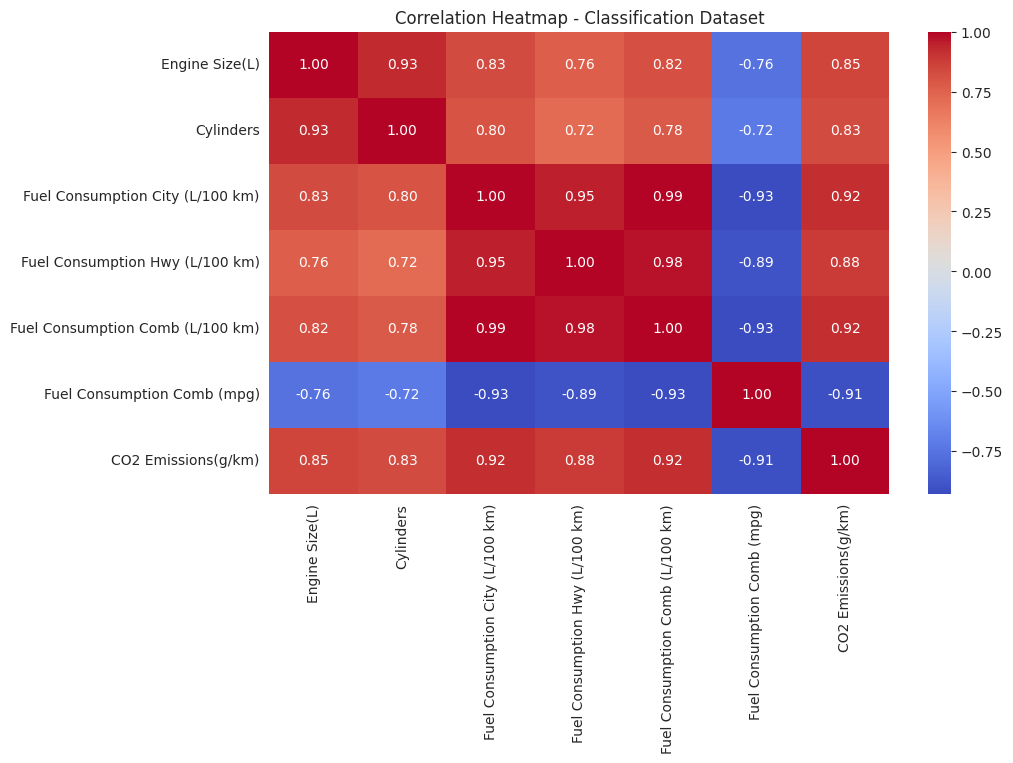

In [ ]:
# Data Visualization for Classification
plt.figure(figsize=(10, 6))
sns.heatmap(df_classification.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Classification Dataset")
plt.show()

In [ ]:
# Step 3: Data Preprocessing Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting features (keeping only relevant predictors)
features = ['Age','Height','Weight']
target = 'TUE'

# Splitting data into training and testing sets (80-20 split)
X = df_cleanedR[features]
y = df_cleanedR[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display final dataset shape
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 1669 samples
Test set size: 418 samples


In [ ]:
# Drop rows with missing values to prevent errors
df_regression = df_regression.dropna()

# Selecting features and target
X_reg = df_regression.iloc[:, :-1]  # Features (all columns except the last one)
y_reg = df_regression.iloc[:, -1]   # Target (the last column)

# Ensure only numeric features
X_reg = X_reg.select_dtypes(include=['number'])

# Encode the target variable if it's categorical
if y_reg.dtype == 'object':
    label_encoder = LabelEncoder()
    y_reg = label_encoder.fit_transform(y_reg)

# Convert target variable to float (prevents errors with LinearRegression)
y_reg = y_reg.astype(np.float64)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
lin_reg = LinearRegression()
lin_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = lin_reg.predict(X_reg_test)
mse_reg = mean_squared_error(y_reg_test, y_reg_pred)
r2_reg = r2_score(y_reg_test, y_reg_pred)

# Print the results
print(f"Linear Regression - MSE: {mse_reg:.4f}, R2 Score: {r2_reg:.4f}")

Linear Regression - MSE: 2.9304, R2 Score: 0.2065


In [ ]:
# Regression Task: Ridge Regression Hyperparameter Tuning
from sklearn.linear_model import Ridge # Import Ridge
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
ridge = Ridge()
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_reg_train, y_reg_train)
best_ridge = Ridge(alpha=grid_ridge.best_params_['alpha'])
best_ridge.fit(X_reg_train, y_reg_train)
y_reg_pred_final = best_ridge.predict(X_reg_test)
mse_reg_final = mean_squared_error(y_reg_test, y_reg_pred_final)
r2_reg_final = r2_score(y_reg_test, y_reg_pred_final)
print("Ridge Regression (Final) - MSE:", mse_reg_final, "R2 Score:", r2_reg_final)

Ridge Regression (Final) - MSE: 2.9324125118952344 R2 Score: 0.20599132233344475


In [ ]:
# Define the target variable (Make sure this name matches the dataset column)
target_variable_name = 'CO2 Emissions(g/km)'  # Change based on actual column name

# Convert target to binary classification: High Emission (1) if >400, else Low Emission (0)
df_classification["High_Emission"] = (df_classification[target_variable_name] > 400).astype(int)

# Define features (drop the original CO2 emissions column)
X_clf = df_classification.drop(columns=[target_variable_name, "High_Emission"]).select_dtypes(include=['number'])
y_clf = df_classification["High_Emission"]

# Split the data into training and testing sets
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf  # Stratify ensures class balance
)

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_clf_train, y_clf_train)

# Make predictions
y_clf_pred = log_reg.predict(X_clf_test)

# Evaluate the model
accuracy_clf = accuracy_score(y_clf_test, y_clf_pred)
precision_clf = precision_score(y_clf_test, y_clf_pred, average="binary")
recall_clf = recall_score(y_clf_test, y_clf_pred, average="binary")
f1_clf = f1_score(y_clf_test, y_clf_pred, average="binary")

# Print results
print(f"Logistic Regression - Accuracy: {accuracy_clf:.4f}, Precision: {precision_clf:.4f}, Recall: {recall_clf:.4f}, F1 Score: {f1_clf:.4f}")


Logistic Regression - Accuracy: 0.9885, Precision: 0.7143, Recall: 0.2500, F1 Score: 0.3704


In [ ]:
# Classification Task: Logistic Regression Hyperparameter Tuning
param_grid_logreg = {'C': [0.01, 0.1, 1, 10, 100]}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_clf_train, y_clf_train)
best_logreg = LogisticRegression(C=grid_logreg.best_params_['C'], max_iter=1000)
best_logreg.fit(X_clf_train, y_clf_train)
y_clf_pred_final = best_logreg.predict(X_clf_test)
accuracy_clf_final = accuracy_score(y_clf_test, y_clf_pred_final)
precision_clf_final = precision_score(y_clf_test, y_clf_pred_final)
recall_clf_final = recall_score(y_clf_test, y_clf_pred_final)
f1_clf_final = f1_score(y_clf_test, y_clf_pred_final)
print("Logistic Regression (Final) - Accuracy:", accuracy_clf_final, "Precision:", precision_clf_final, "Recall:", recall_clf_final, "F1 Score:", f1_clf_final)


Logistic Regression (Final) - Accuracy: 0.988490182802979 Precision: 0.7142857142857143 Recall: 0.25 F1 Score: 0.37037037037037035
